<a href="https://colab.research.google.com/github/vishwath-williams/Library-Management/blob/main/MLP_Pima/Clean_Train_PIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple MLP for PIMA Indian Dataset**

In [46]:
!ls

deep_learning  sample_data


**Importing Packages**

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

In [48]:
seed = 7
numpy.random.seed(seed)

**load pima indians dataset**

In [49]:
dataset = numpy.loadtxt("deep_learning/MLP_Pima/pima-indians-diabetes.csv", delimiter=",")

**split into input (X) and output (Y)**

In [51]:
X = dataset[:,0:8]
Y = dataset[:,8]

**create model**

In [52]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
!git clone https://github.com/deepanrajm/deep_learning.git

fatal: destination path 'deep_learning' already exists and is not an empty directory.


**Compile model**

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit the Model**

In [14]:
h= model.fit(X, Y, epochs=40, batch_size=10)

Epoch 1/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5116 - loss: 2.5103
Epoch 2/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - loss: 0.6812
Epoch 3/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.6328
Epoch 4/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.6398
Epoch 5/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6724 - loss: 0.6185
Epoch 6/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - loss: 0.6536
Epoch 7/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.6376
Epoch 8/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.6016
Epoch 9/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.6594
Epoch 10/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6892 - loss: 0.6171
Epoch 11/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6915 - loss: 0.6003
Epoch 12/40
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7058 - lo

**Evaluate The Model**

dict_keys(['accuracy', 'loss'])


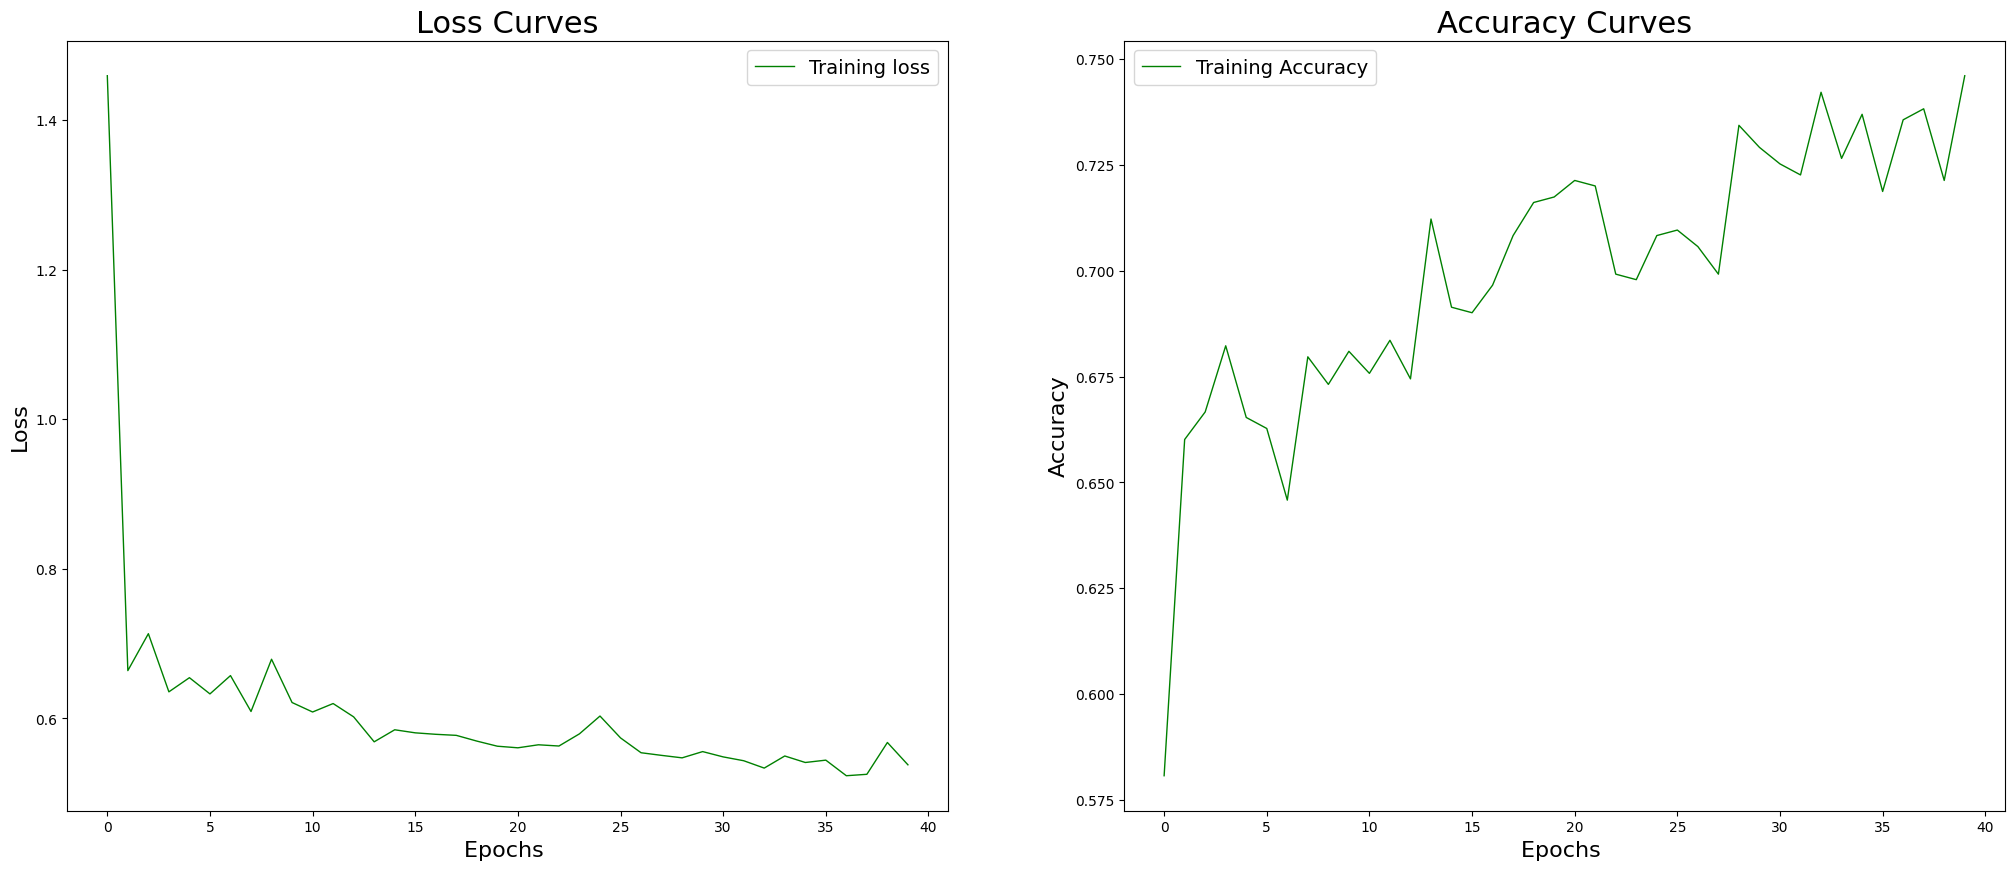

In [15]:
import matplotlib.pyplot as plt
print(h.history.keys())

# Loss Curves
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'],'-g',linewidth=1.0)
# plt.plot(h.history['val_loss'],'-r',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=22)

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(h.history['accuracy'],'-g',linewidth=1.0)
# plt.plot(h.history['val_accuracy'],'-r',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=22)
plt.show()

In [22]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7456 - loss: 0.5275  
compile_metrics: 76.43%


# Data Cleaning

In [23]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("deep_learning/MLP_Pima/pima-indians-diabetes.csv")

In [24]:
df.columns = ["Pregnancies",	"Glucose", 	"BP",	"SkinThickness","Insulin"	,"BMI"	,"DiabetesPedigreeFunction",	"Age"	,"Outcome"]

In [25]:
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BP                        767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.isnull().any()

,0
Pregnancies,False
Glucose,False
BP,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [28]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [29]:
df_copy = df.copy(deep=True)
df_copy[['Glucose','BP','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BP','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,5
BP,35
SkinThickness,227
Insulin,373
BMI,11
DPF,0
Age,0
Outcome,0


In [30]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BP'].fillna(df_copy['BP'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

/tmp/ipython-input-30-3390711400.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
/tmp/ipython-input-30-3390711400.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [31]:
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BP,0
SkinThickness,0
Insulin,0
BMI,0
DPF,0
Age,0
Outcome,0


In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error

In [40]:
X = df_copy[["Pregnancies", "Glucose", "BP", "SkinThickness", "Insulin", "BMI", "DPF", "Age"]]
y = df_copy[["Outcome"]]

# Data needs to be scaled to  0 to 1 for the neural network to train correctly.
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale both the training inputs and outputs
X[X.columns] = X_scaler.fit_transform(X[X.columns])
y[y.columns] = y_scaler.fit_transform(y[y.columns])

# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

/tmp/ipython-input-40-1188635007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns] = X_scaler.fit_transform(X[X.columns])
/tmp/ipython-input-40-1188635007.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y.columns] = y_scaler.fit_transform(y[y.columns])


In [41]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
h = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=10,
    shuffle=True,validation_data=(X_test, y_test)
)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6521 - loss: 0.6782 - val_accuracy: 0.6615 - val_loss: 0.6321
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6478 - loss: 0.6308 - val_accuracy: 0.6615 - val_loss: 0.5868
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6581 - loss: 0.5847 - val_accuracy: 0.6979 - val_loss: 0.5454
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7255 - loss: 0.5294 - val_accuracy: 0.7604 - val_loss: 0.5121
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7746 - loss: 0.5188 - val_accuracy: 0.7500 - val_loss: 0.4828
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7790 - loss: 0.4897 - val_accuracy: 0.7604 - val_loss: 0.4800
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7363 - loss: 0.5087 - val_accuracy: 0.7604 - val_loss: 0.4688
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7529 - loss: 0.4779 - val_accuracy: 0.7865 - val_loss:

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


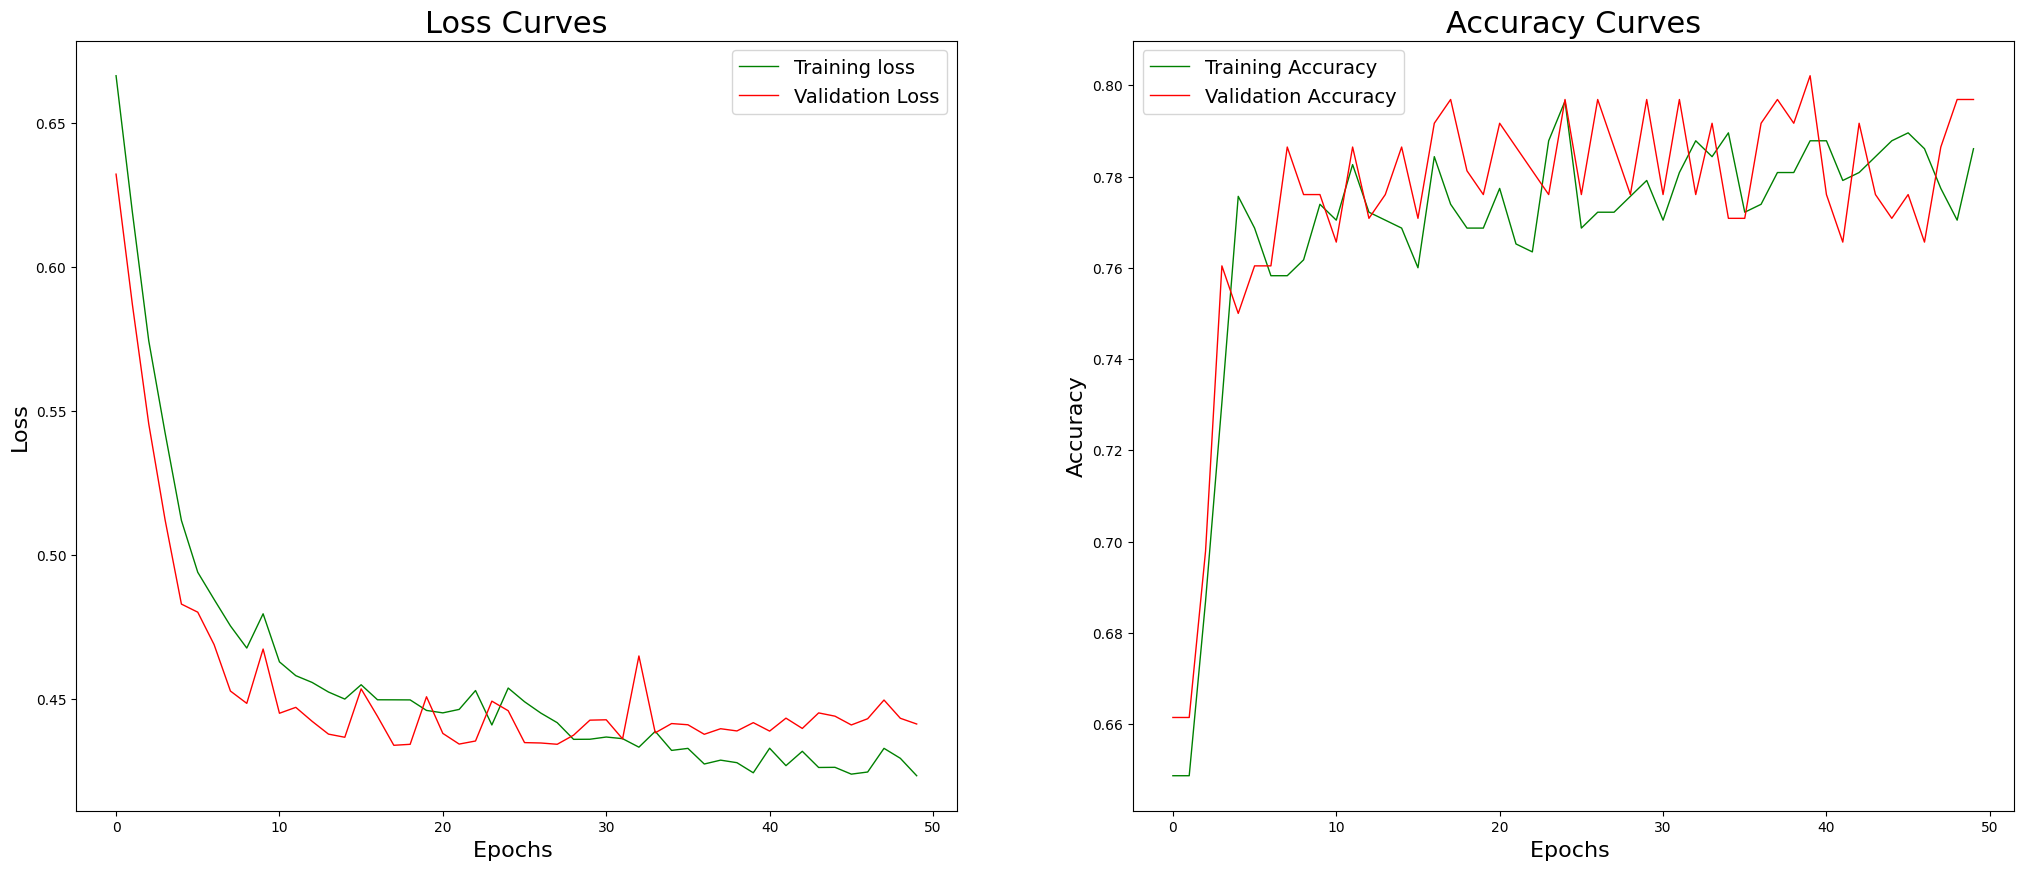

In [44]:

print(h.history.keys())

# Loss Curves
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'],'-g',linewidth=1.0)
plt.plot(h.history['val_loss'],'-r',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=22)

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(h.history['accuracy'],'-g',linewidth=1.0)
plt.plot(h.history['val_accuracy'],'-r',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=22)
plt.show()

In [45]:
patient_data = [
    2,  # Pregnancy
    138,  # Glucose
    62,  # BP
    35,  # SkinThickness
    50, # Insulin
    33.6, #BMI
    0.127,  #DPF
    47 # Age

]

# Keras assumes we want to predict the values for multiple of patient data at once, so it expects an array.
# We only want to value a single patient data, so it will be the only item in our array.
database = [
    patient_data
]

# Scale the new data like the training data
scaled_database_data = X_scaler.transform(database)

# Make a prediction for each house in the scaled_database_data array (but we only have one)
result_value = model.predict(scaled_database_data)

# The prediction from the neural network will be scaled 0 to 1 just like the training data
# We need to unscale it using the same factor as we used to scale the training data
unscaled_patient_result = y_scaler.inverse_transform(result_value)

# Since we are only predicting the price of one house, grab the first prediction returned
predicted_value = unscaled_patient_result[0][0]

if predicted_value > 0.:
  print("You've Diabetics")
else:
  print("You don't have the diabetics")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
You've Diabetics


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
